In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tweets.csv')
df

/var/folders/wq/_lzgwh6s54qblt33086j4j140000gn/T/ipykernel_1137/2375125115.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tweets.csv')


user_name  \
0                     Bohmle   
1                        NaN   
2               Dan Bruno AI   
3            Georgiana Comsa   
4               Bitone Great   
...                      ...   
3412806     (I)(AM)(T)(MOYO)   
3412807                Green   
3412808  Gabriel Furstenheim   
3412809               Devang   
3412810      Norman Meuschke   

                                                      text  \
0        #GPT4 for FREE. \nNo its not a clickbait, @Qol...   
1                                            AI enthusiast   
2        ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3        New: @JWVance's post about 5 #startups (includ...   
4        🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...   
...                                                    ...   
3412806  Levels🙏🙏🙏,so happy for the chatGPT team for co...   
3412807  Iterating back-and-forth with tools like #Chat...   
3412808  Russel vs ChatGPT. It's also funny that it tak...   
3412809  Was just wondering is there any difference bet...   
3412810  #ChatGPT and similar #LLM pose a challenge to ...   

                     user_location  \
0                        Carkingga   
1        2019-07-03 03:44:41+00:00   
2                   Manchester, NH   
3                        Palo Alto   
4                        Hong Kong   
...                            ...   
3412806             Satoshi Island   
3412807                          🍁   
3412808                        NaN   
3412809              United States   
3412810         Wuppertal, Germany   

                                          user_description  \
0                                                      NaN   
1                                                     60.0   
2        The latest in #ChatGPT, #BARD, #Bing, and othe...   
3        Founder of Silicon Valley PR, award-winning PR...   
4        #ChatGPT (AI) powered Free Trading Signal! \nL...   
...                                                    ...   
3412806  Blockchain Enthusiast || Philanthropist || a S...   
3412807                                                NaN   
3412808  Mathematician and Developer @Amazon. Previousl...   
3412809  passionate by nature, software developer by pr...   
3412810  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                      user_created user_followers user_friends  \
0                              NaN            NaN          NaN   
1                            349.0            611        False   
2        2021-05-19 01:19:32+00:00          470.0        157.0   
3        2008-12-24 09:32:23+00:00         3864.0       1883.0   
4        2022-11-21 04:42:18+00:00         1517.0        506.0   
...                            ...            ...          ...   
3412806  2013-12-07 16:38:30+00:00         3419.0       4994.0   
3412807  2022-12-03 12:49:13+00:00            3.0         33.0   
3412808  2016-07-09 21:08:52+00:00           80.0         34.0   
3412809  2015-05-19 03:17:06+00:00           15.0         86.0   
3412810  2011-02-22 18:03:52+00:00          149.0        262.0   

                   user_favourites         user_verified  \
0                              NaN                   NaN   
1        2023-05-17 18:11:12+00:00  ['GPT4', 'ChatGPT4']   
2                             5185                 False   
3                             2415                 False   
4                               64                 False   
...                            ...                   ...   
3412806                      16659                 False   
3412807                          3                 False   
3412808                        169                 False   
3412809                        307                 False   
3412810                        451                 False   

                              date                          hashtags  \
0                              NaN                               NaN   
1                  Twitter We

## 2) Preprocessing and Cleaning

In [3]:
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm

In [4]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

In [5]:
# drop rows with missing values
df.dropna(inplace=True)

In [6]:
#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)



def clean_text(text):
    _steps = [
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    lemma,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return " ".join(text)   

In [7]:
df["text"] = df["text"].astype(str)
df["text"] = [x.replace(':',' ') for x in df["text"]]

In [8]:
df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])

  0%|          | 0/258900 [00:00<?, ?it/s]

In [43]:
clean_text = df['clean_text'].to_list()
temp = []
for sentence in clean_text:
    xtemp = re.sub(r'       ', ',', str(sentence))
    xtemp = re.sub(r'   ', '', str(xtemp))
    temp.append(re.sub(',', ' ', str(xtemp)))

clean_text = temp

In [44]:
clean_text

['get binance spot recommendation short ticker ghstusdt time interval   min last price    rsi  powered chatgpt ghst ghst alphaquarktoken gon na long wait short http tcoqiqgtt aa',
 'video show company logo based website domain short http tcoswo  gnqbea get companylogo api chatgpt http tcovslbwtatfx',
 'used cerberusgpt hologeneticslab simulated hologenetic digitalorganic supercomputer create internal revision system chatgpt based organic process even system subject security breach likely prompt injection http tcoaa  oxdv  qt',
 'andre look chatgpt created ad promoting ai featuring amp alleniverson http tcowvdthu  wml',
 'sell binance spot recommendation short ticker farmbusd time interval   min last price  rsi  powered chatgpt farm farm gon na long wait short http tcoa  ebrdtaxz',
 'timeline going wonky blame chatgpt http tcom  nuyfveec',
 'time sell binance spot recommendation short ticker mlnusdt time interval   min last price    rsi  powered chatgpt mln mln ethereumclassic gon na lo

In [52]:
df['clean_text'] = clean_text

In [53]:
df

user_name  \
2                                             Dan Bruno AI   
3                                          Georgiana Comsa   
4                                             Bitone Great   
6                  ScrapeLogo: acquired by RiteKit in 2015   
7                        vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
...                                                    ...   
3412800                                       Abhas Tandon   
3412802                                       Rλan Tomczik   
3412804  Nick Perkins • Hebrews 13:8 • Development Manager   
3412809                                             Devang   
3412810                                    Norman Meuschke   

                                                      text  \
2        ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3        New  @JWVance's post about 5 #startups (includ...   
4        🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...   
6        Video   Show a company's logo based on the web...   
7        I just used my #CerberusGPT HologeneticsLab an...   
...                                                    ...   
3412800  These opinions are not mine. The above critici...   
3412802  At least #ChatGPT can admit when it makes mist...   
3412804  Ok now @OpenAI is just showing off. lol #ChatG...   
3412809  Was just wondering is there any difference bet...   
3412810  #ChatGPT and similar #LLM pose a challenge to ...   

                        user_location  \
2                      Manchester, NH   
3                           Palo Alto   
4                           Hong Kong   
6              Prague, Czech Republic   
7                          London, ON   
...                               ...   
3412800                         India   
3412802               Minneapolis, MN   
3412804  Raleigh, North Carolina, USA   
3412809                 United States   
3412810            Wuppertal, Germany   

                                          user_description  \
2        The latest in #ChatGPT, #BARD, #Bing, and othe...   
3        Founder of Silicon Valley PR, award-winning PR...   
4        #ChatGPT (AI) powered Free Trading Signal! \nL...   
6        Test RiteKit #RESTAPI solutions in demo page. ...   
7        🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
...                                                    ...   
3412800  Yet another Software Engineer. #JavaScript #no...   
3412802  Functional Programming, Music Theory, Data Eng...   
3412804  A proud Dad of 3, husband, Dev manager, iOS en...   
3412809  passionate by nature, software developer by pr...   
3412810  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                      user_created user_followers user_friends  \
2        2021-05-19 01:19:32+00:00          470.0        157.0   
3        2008-12-24 09:32:23+00:00         3864.0       1883.0   
4        2022-11-21 04:42:18+00:00         1517.0        506.0   
6        2015-01-31 04:13:07+00:00          176.0         54.0   
7        2021-01-30 21:03:36+00:00          123.0        299.0   
...                            ...            ...          ...   
3412800  2009-06-06 15:27:28+00:00         3549.0       1318.0   
3412802  2011-12-10 18:31:35+00:00          279.0       2179.0   
3412804  2013-12-04 17:12:00+00:00          164.0        326.0   
3412809  2015-05-19 03:17:06+00:00           15.0         86.0   
3412810  2011-02-22 18:03:52+00:00          149.0        262.0   

        user_favourites user_verified                       date  \
2                  5185         False  2023-05-17 18:11:03+00:00   
3                  2415         False  2023-05-17 18:10:25+00:00   
4                    64         False  2023-05-17 18:09:39+00:00   
6                   274         False  2023-05-17 18:09:04+00:00   
7                  8938         False  2023-05-17 18:09:00+00:00   
...                 ...           ...                        ...   
3412800            1220         False  2022-12-05 17

## 3 Ngram Analysis

In [116]:
corpus = ''
for sentence in clean_text:
    corpus = corpus + sentence
    
corpus

'get binance spot recommendation short ticker ghstusdt time interval   min last price    rsi  powered chatgpt ghst ghst alphaquarktoken gon na long wait short http tcoqiqgtt aavideo show company logo based website domain short http tcoswo  gnqbea get companylogo api chatgpt http tcovslbwtatfxused cerberusgpt hologeneticslab simulated hologenetic digitalorganic supercomputer create internal revision system chatgpt based organic process even system subject security breach likely prompt injection http tcoaa  oxdv  qtandre look chatgpt created ad promoting ai featuring amp alleniverson http tcowvdthu  wmlsell binance spot recommendation short ticker farmbusd time interval   min last price  rsi  powered chatgpt farm farm gon na long wait short http tcoa  ebrdtaxztimeline going wonky blame chatgpt http tcom  nuyfveectime sell binance spot recommendation short ticker mlnusdt time interval   min last price    rsi  powered chatgpt mln mln ethereumclassic gon na long wait short http tco fqdjdxrt

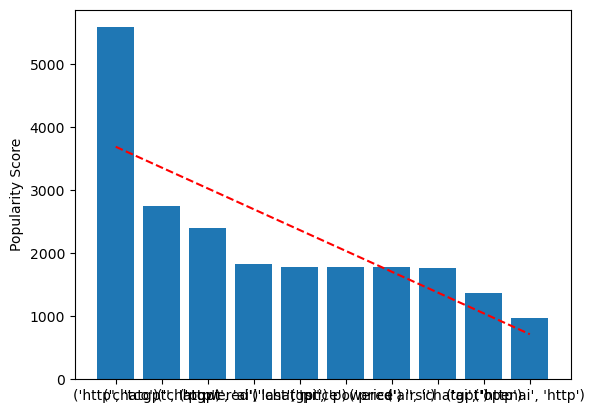

In [159]:
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Tokenization
tokens = word_tokenize(corpus)

# Bi-gram Generation
n = 2  
n_grams = ngrams(tokens, n)

# Counting
all_fdist = FreqDist(n_grams).most_common(10)

# Plotting
people = list(zip(*all_fdist))[0]
score = list(zip(*all_fdist))[1]
x_pos = np.arange(len(people)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

In [160]:
all_fdist

[(('http', 'tco'), 5586),
 (('chatgpt', 'http'), 2749),
 (('chatgpt', 'ai'), 2404),
 (('powered', 'chatgpt'), 1834),
 (('last', 'price'), 1783),
 (('rsi', 'powered'), 1783),
 (('price', 'rsi'), 1777),
 (('ai', 'chatgpt'), 1768),
 (('ai', 'http'), 1366),
 (('openai', 'http'), 974)]

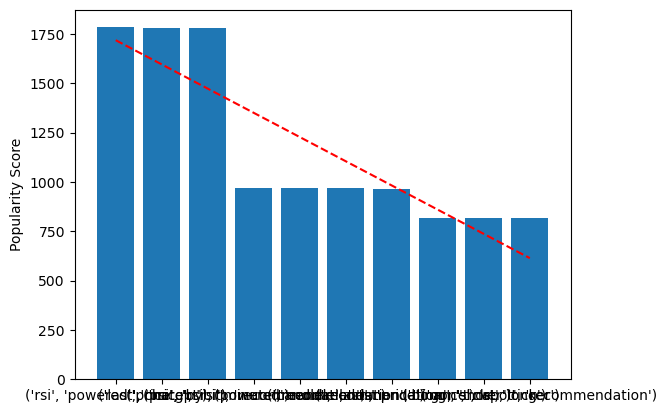

In [161]:
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Tokenization
tokens = word_tokenize(corpus)

# Bi-gram Generation
n = 3  
n_grams = ngrams(tokens, n)

# Counting
all_dist = FreqDist(n_grams).most_common(10)

# Plotting
people = list(zip(*all_dist))[0]
score = list(zip(*all_dist))[1]
x_pos = np.arange(len(people)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

In [162]:
all_dist

[(('rsi', 'powered', 'chatgpt'), 1783),
 (('last', 'price', 'rsi'), 1777),
 (('price', 'rsi', 'powered'), 1777),
 (('rsi', 'bybit', 'recommendation'), 968),
 (('minute', 'candle', 'last'), 968),
 (('candle', 'last', 'price'), 968),
 (('recommendation', 'long', 'ticker'), 966),
 (('recommendation', 'short', 'ticker'), 817),
 (('gon', 'na', 'long'), 817),
 (('binance', 'spot', 'recommendation'), 815)]

## 4) Sentimental Analysis

Using Textblob

In [45]:
from textblob import TextBlob

In [54]:
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet['TextBlob_Subjectivity'] =    tweet['clean_text'].apply(getSubjectivity)
 tweet ['TextBlob_Polarity'] = tweet['clean_text'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['TextBlob_Analysis'] = tweet['TextBlob_Polarity'].apply(getAnalysis )
 return tweet

In [57]:
df = sentiment_analysis(df)

In [58]:
df

user_name  \
2                                             Dan Bruno AI   
3                                          Georgiana Comsa   
4                                             Bitone Great   
6                  ScrapeLogo: acquired by RiteKit in 2015   
7                        vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
...                                                    ...   
3412800                                       Abhas Tandon   
3412802                                       Rλan Tomczik   
3412804  Nick Perkins • Hebrews 13:8 • Development Manager   
3412809                                             Devang   
3412810                                    Norman Meuschke   

                                                      text  \
2        ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3        New  @JWVance's post about 5 #startups (includ...   
4        🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...   
6        Video   Show a company's logo based on the web...   
7        I just used my #CerberusGPT HologeneticsLab an...   
...                                                    ...   
3412800  These opinions are not mine. The above critici...   
3412802  At least #ChatGPT can admit when it makes mist...   
3412804  Ok now @OpenAI is just showing off. lol #ChatG...   
3412809  Was just wondering is there any difference bet...   
3412810  #ChatGPT and similar #LLM pose a challenge to ...   

                        user_location  \
2                      Manchester, NH   
3                           Palo Alto   
4                           Hong Kong   
6              Prague, Czech Republic   
7                          London, ON   
...                               ...   
3412800                         India   
3412802               Minneapolis, MN   
3412804  Raleigh, North Carolina, USA   
3412809                 United States   
3412810            Wuppertal, Germany   

                                          user_description  \
2        The latest in #ChatGPT, #BARD, #Bing, and othe...   
3        Founder of Silicon Valley PR, award-winning PR...   
4        #ChatGPT (AI) powered Free Trading Signal! \nL...   
6        Test RiteKit #RESTAPI solutions in demo page. ...   
7        🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
...                                                    ...   
3412800  Yet another Software Engineer. #JavaScript #no...   
3412802  Functional Programming, Music Theory, Data Eng...   
3412804  A proud Dad of 3, husband, Dev manager, iOS en...   
3412809  passionate by nature, software developer by pr...   
3412810  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                      user_created user_followers user_friends  \
2        2021-05-19 01:19:32+00:00          470.0        157.0   
3        2008-12-24 09:32:23+00:00         3864.0       1883.0   
4        2022-11-21 04:42:18+00:00         1517.0        506.0   
6        2015-01-31 04:13:07+00:00          176.0         54.0   
7        2021-01-30 21:03:36+00:00          123.0        299.0   
...                            ...            ...          ...   
3412800  2009-06-06 15:27:28+00:00         3549.0       1318.0   
3412802  2011-12-10 18:31:35+00:00          279.0       2179.0   
3412804  2013-12-04 17:12:00+00:00          164.0        326.0   
3412809  2015-05-19 03:17:06+00:00           15.0         86.0   
3412810  2011-02-22 18:03:52+00:00          149.0        262.0   

        user_favourites user_verified                       date  \
2                  5185         False  2023-05-17 18:11:03+00:00   
3                  2415         False  2023-05-17 18:10:25+00:00   
4                    64         False  2023-05-17 18:09:39+00:00   
6                   274         False  2023-05-17 18:09:04+00:00   
7                  8938         False  2023-05-17 18:09:00+00:00   
...                 ...           ...                        ...   
3412800            1220         False  2022-12-05 17

Using RoBERTa

In [64]:
# Importing the libraries needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import logging
logging.basicConfig(level=logging.ERROR)

In [63]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [65]:
# Load pre-trained model and tokenizer
model_name = 'roberta-base'  # You can change this to a different pre-trained model
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [66]:
# Set model to evaluation mode
model.to(device)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [67]:
sentiments = []
for sentence in clean_text:
    # Tokenize input sentence
    tokens = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        padding='max_length',
        max_length=512,
        truncation=True,
        return_tensors='pt'
    )

    # Move input tensors to the device
    input_ids = tokens['input_ids'].to(device)
    attention_mask = tokens['attention_mask'].to(device)

    # Perform sentiment analysis
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get predicted sentiment label
    predicted_label = torch.argmax(outputs.logits).item()

    # Map predicted label to sentiment
    sentiment_mapping = {
        0: 'negative',
        1: 'neutral',
        2: 'positive'
    }
    predicted_sentiment = sentiment_mapping[predicted_label]
    sentiments.append(predicted_sentiment)

KeyboardInterrupt: 

## 5) Feature Engineering 

In [71]:
# length of sentences in characters / no of characters
length = [len(sentence) for sentence in clean_text]
df['tweet length'] = length

# number of words
no_of_words = [len(sentence.split()) for sentence in clean_text]
df['no of words'] = no_of_words

# number of spaces
no_of_spaces = [len(sentence.split()) - 1 for sentence in clean_text]
df['no of spaces'] = no_of_spaces

In [77]:
# no of verbs
import nltk
from nltk import word_tokenize
from collections import Counter

no_of_verbs = []
for sentence in clean_text:
    tokens = word_tokenize(sentence)
    tags = nltk.pos_tag(tokens, tagset = "universal")
    counts = Counter(tag for word,tag in tags)
    no_of_verbs.append(counts['VERB'])
    
    
df['no_of_verbs'] = no_of_verbs

In [78]:
# no of words starting with M
no_of_M = []
for sentence in clean_text:
    cnt = 0
    tokens = word_tokenize(sentence)
    for token in tokens:
        if token[0] == 'm' or token[0] == 'M':
            cnt += 1
    no_of_M.append(cnt)
            
df['no of words starting with M'] = no_of_M

In [79]:
df

user_name  \
2                                             Dan Bruno AI   
3                                          Georgiana Comsa   
4                                             Bitone Great   
6                  ScrapeLogo: acquired by RiteKit in 2015   
7                        vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵   
...                                                    ...   
3412800                                       Abhas Tandon   
3412802                                       Rλan Tomczik   
3412804  Nick Perkins • Hebrews 13:8 • Development Manager   
3412809                                             Devang   
3412810                                    Norman Meuschke   

                                                      text  \
2        ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3        New  @JWVance's post about 5 #startups (includ...   
4        🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...   
6        Video   Show a company's logo based on the web...   
7        I just used my #CerberusGPT HologeneticsLab an...   
...                                                    ...   
3412800  These opinions are not mine. The above critici...   
3412802  At least #ChatGPT can admit when it makes mist...   
3412804  Ok now @OpenAI is just showing off. lol #ChatG...   
3412809  Was just wondering is there any difference bet...   
3412810  #ChatGPT and similar #LLM pose a challenge to ...   

                        user_location  \
2                      Manchester, NH   
3                           Palo Alto   
4                           Hong Kong   
6              Prague, Czech Republic   
7                          London, ON   
...                               ...   
3412800                         India   
3412802               Minneapolis, MN   
3412804  Raleigh, North Carolina, USA   
3412809                 United States   
3412810            Wuppertal, Germany   

                                          user_description  \
2        The latest in #ChatGPT, #BARD, #Bing, and othe...   
3        Founder of Silicon Valley PR, award-winning PR...   
4        #ChatGPT (AI) powered Free Trading Signal! \nL...   
6        Test RiteKit #RESTAPI solutions in demo page. ...   
7        🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...   
...                                                    ...   
3412800  Yet another Software Engineer. #JavaScript #no...   
3412802  Functional Programming, Music Theory, Data Eng...   
3412804  A proud Dad of 3, husband, Dev manager, iOS en...   
3412809  passionate by nature, software developer by pr...   
3412810  Postdoc in @GippLab at @uniGoettingen \nPh.D. ...   

                      user_created user_followers user_friends  \
2        2021-05-19 01:19:32+00:00          470.0        157.0   
3        2008-12-24 09:32:23+00:00         3864.0       1883.0   
4        2022-11-21 04:42:18+00:00         1517.0        506.0   
6        2015-01-31 04:13:07+00:00          176.0         54.0   
7        2021-01-30 21:03:36+00:00          123.0        299.0   
...                            ...            ...          ...   
3412800  2009-06-06 15:27:28+00:00         3549.0       1318.0   
3412802  2011-12-10 18:31:35+00:00          279.0       2179.0   
3412804  2013-12-04 17:12:00+00:00          164.0        326.0   
3412809  2015-05-19 03:17:06+00:00           15.0         86.0   
3412810  2011-02-22 18:03:52+00:00          149.0        262.0   

        user_favourites user_verified                       date  ...  \
2                  5185         False  2023-05-17 18:11:03+00:00  ...   
3                  2415         False  2023-05-17 18:10:25+00:00  ...   
4                    64         False  2023-05-17 18:09:39+00:00  ...   
6                   274         False  2023-05-17 18:09:04+00:00  ...   
7                  8938         False  2023-05-17 18:09:00+00:00  ...   
...                 ...           ...                        ...  ...   
3412800          

## 6) Vectorization

countVectorizer

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [83]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(clean_text)

<258900x80249 sparse matrix of type '<class 'numpy.int64'>'
	with 807030 stored elements in Compressed Sparse Row format>

In [130]:
count_vector_features = count_vectorizer.get_feature_names_out()

In [134]:
cnt_vec = pd.DataFrame(count_vector_features)
cnt_vec

0
0                aa
1               aaa
2           aaaaaaa
3      aaaaaahahaha
4           aaaaand
...             ...
80244         zzucf
80245         zzvcu
80246          zzww
80247           zzz
80248          zzzz

[80249 rows x 1 columns]

TF-IDF

In [84]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit_transform(clean_text)

<258900x80249 sparse matrix of type '<class 'numpy.float64'>'
	with 807030 stored elements in Compressed Sparse Row format>

In [133]:
tfidf_vector_features = tfidf_vectorizer.get_feature_names_out()

In [135]:
tf = pd.DataFrame(tfidf_vector_features)
tf

0
0                aa
1               aaa
2           aaaaaaa
3      aaaaaahahaha
4           aaaaand
...             ...
80244         zzucf
80245         zzvcu
80246          zzww
80247           zzz
80248          zzzz

[80249 rows x 1 columns]

Word2Vec

In [87]:
from gensim.models import Word2Vec

word2vec_corpus = [document.split() for document in clean_text]
word2vec_model = Word2Vec(word2vec_corpus, window=5, min_count=1, workers=4)

In [139]:
# Add Word2Vec features to DataFrame
word_vec = pd.DataFrame(list(word2vec_model.wv.key_to_index))
word_vec

0
0                nan
1            chatgpt
2               http
3                 ai
4                gpt
...              ...
80270  weareteachers
80271            gzf
80272     tcolzbwmre
80273    joannastern
80274       hrtechuk

[80275 rows x 1 columns]

## 7) FEATURE SELECTION

/var/folders/wq/_lzgwh6s54qblt33086j4j140000gn/T/ipykernel_1137/2424250762.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


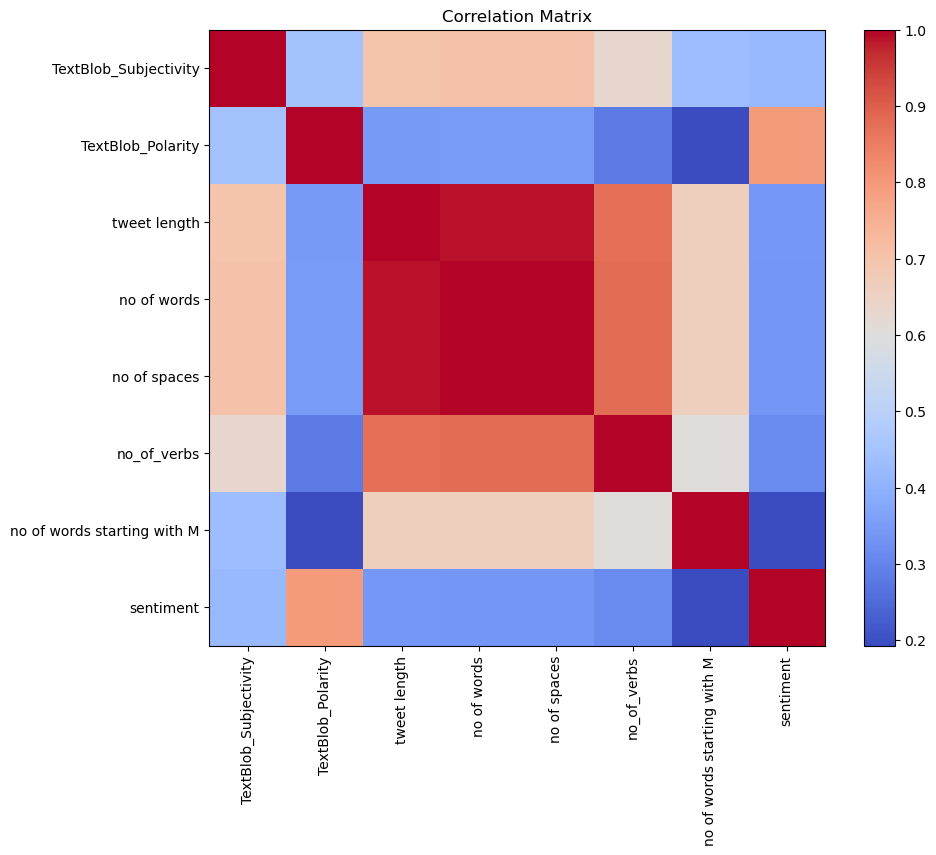

In [153]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [151]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['sentiment']= label_encoder.fit_transform(df['TextBlob_Analysis'])

In [154]:
# Find the feature with the highest correlation to the target variable
target_variable = 'sentiment'
correlation_values = correlation_matrix[target_variable].abs()
best_feature = correlation_values.idxmax()

# Print the best feature
print("The best feature is:", best_feature)

The best feature is: sentiment
